### Лабораторная работа № 2. Вариант №2. Горшков Артем Владимирович

#### Задание №1.

Пусть акция стоит 700 . На рынке можно купить европейский Call опцион с ценой испол- нения (Strike price) X = 720 по цене 35 с погашением через T = 1 год. У Васи, Пети и Коли есть вера и 700  у каждого – они хотят вложиться в эти акции. Посчитайте результаты их инвестиций (абсолютные и в процентах), если Вася купит только один опцион, Петя – одну акцию, Коля – опционы на все деньги, и цена акции через год будет
1) 650
2) 690
3) 710
4) 730
5) 750

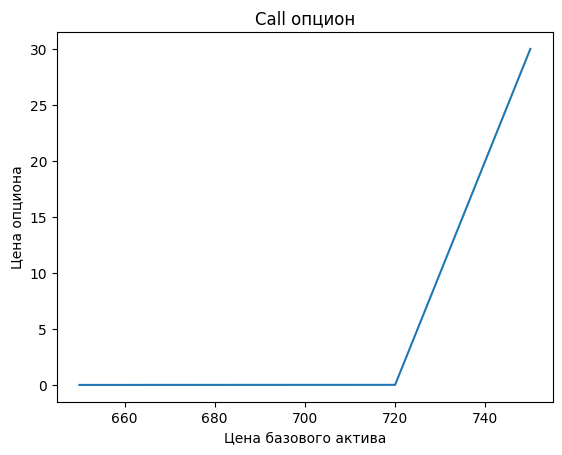

In [17]:
import numpy as np
import matplotlib.pyplot as plt

option_fun = lambda x: max(x - 720, 0)

x = np.linspace(650, 750, 10000)
y = np.array(list(map(option_fun, x)))
plt.plot(x, y)
plt.title('Call опцион')
plt.xlabel('Цена базового актива')
plt.ylabel('Цена опциона')
plt.show()

In [18]:
stock_prices = np.array([650, 690 , 710 , 730 , 750])
option_price = 35
asset_price = 700

#### Вася

In [19]:
# получим итоговый результат для всех возможных цен базового актива
result = list(
    zip(
        np.array(list(map(option_fun, stock_prices))) - option_price,
        stock_prices
    )
)
print(result)

[(-35, 650), (-35, 690), (-35, 710), (-25, 730), (-5, 750)]


In [20]:
[f'При стоимости {j}, абсолютная доходность:  {i}, относительная:  {round(i/option_price * 100, 2)}%' for i, j in result]

['При стоимости 650, абсолютная доходность:  -35, относительная:  -100.0%',
 'При стоимости 690, абсолютная доходность:  -35, относительная:  -100.0%',
 'При стоимости 710, абсолютная доходность:  -35, относительная:  -100.0%',
 'При стоимости 730, абсолютная доходность:  -25, относительная:  -71.43%',
 'При стоимости 750, абсолютная доходность:  -5, относительная:  -14.29%']

#### Петя

In [21]:
[
    f'При стоимости {j}, абсолютная доходность: {i}, относительная: {round(i/asset_price * 100, 2)}%' for i, j in zip(
        stock_prices - asset_price,
        stock_prices
    )
]

['При стоимости 650, абсолютная доходность: -50, относительная: -7.14%',
 'При стоимости 690, абсолютная доходность: -10, относительная: -1.43%',
 'При стоимости 710, абсолютная доходность: 10, относительная: 1.43%',
 'При стоимости 730, абсолютная доходность: 30, относительная: 4.29%',
 'При стоимости 750, абсолютная доходность: 50, относительная: 7.14%']

#### Коля

In [22]:
# получим итоговый результат для всех возможных цен базового актива
n = asset_price / option_price
result2 = list(
    zip(
    np.array(list(map(lambda x: option_fun(x) * n, stock_prices))) - option_price * n,
    stock_prices
    )
)
print(n)
print(result2)

20.0
[(-700.0, 650), (-700.0, 690), (-700.0, 710), (-500.0, 730), (-100.0, 750)]


In [23]:
[
    f'При стоимости {j}, абсолютная доходность: {i}, относительная: {round(i/asset_price * 100, 2)}%' for i, j in result2
]

['При стоимости 650, абсолютная доходность: -700.0, относительная: -100.0%',
 'При стоимости 690, абсолютная доходность: -700.0, относительная: -100.0%',
 'При стоимости 710, абсолютная доходность: -700.0, относительная: -100.0%',
 'При стоимости 730, абсолютная доходность: -500.0, относительная: -71.43%',
 'При стоимости 750, абсолютная доходность: -100.0, относительная: -14.29%']

#### Задание №2.
Пусть цена европейского Put опциона с X = 500  равна 7 , а текущая цена акции pавна S = 506. Найдите цену европейского Call опциона с тем же страйком, если r = 1% и T − t = 5. Ответ округлите до целых.

$$
C = S + P - X * e^{-r * (T - t)}
$$

In [24]:
import math

strike_price = 500
P = 7
S = 506
r = 0.01

C = S + P - strike_price * math.e**(-r * 5)
print(f'Ответ: {round(C, 4)}')

Ответ: 37.3853


#### Задание №3.
При помощи Python:
Для европейскихопционов построить графики зависимостей:
цен и функций выплат от цены базового актива;
Δ, Γ, Θ, V ega, ρ от цены базового актива;
паритет опционов (Put-Call parity).


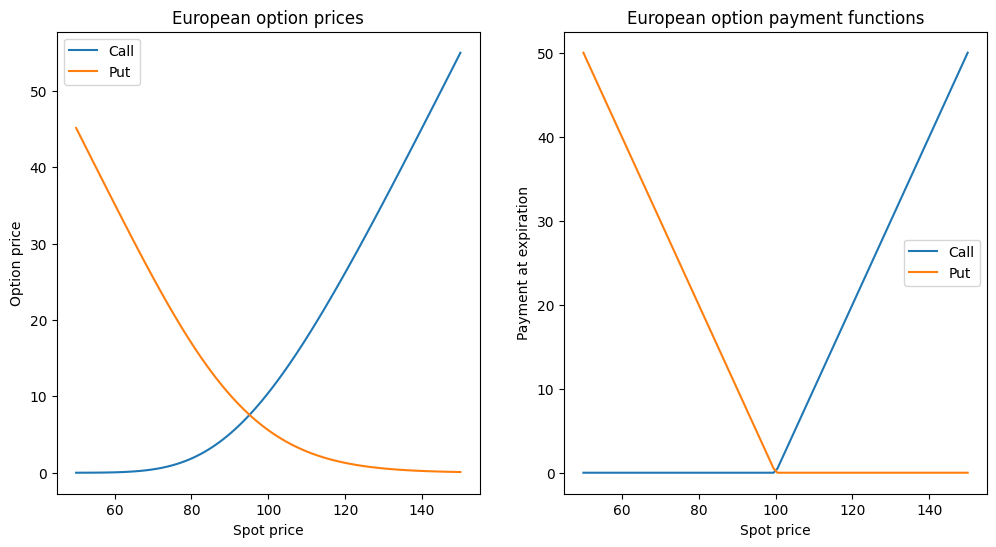

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def bs_price(S, K, r, t, sigma, option_type):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * t) * norm.cdf(d2)
    elif option_type == 'put':
        return K * np.exp(-r * t) * norm.cdf(-d2) - S * norm.cdf(-d1)

K = 100 # strike price
r = 0.05 # rate
sigma = 0.2 # volatility
T = t = 1

S_range = np.linspace(0.5*K, 1.5*K, 100)

call_prices = [bs_price(s, K, r, T, sigma, 'call') for s in S_range]
put_prices = [bs_price(s, K, r, T, sigma, 'put') for s in S_range]

call_payments = [max(s - K, 0) for s in S_range]
put_payments = [max(K - s, 0) for s in S_range]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
ax[0].plot(S_range, call_prices, label='Call')
ax[0].plot(S_range, put_prices, label='Put')
ax[0].set_xlabel('Spot price')
ax[0].set_ylabel('Option price')
ax[0].set_title('European option prices')
ax[0].legend()

ax[1].plot(S_range, call_payments, label='Call')
ax[1].plot(S_range, put_payments, label='Put')
ax[1].set_xlabel('Spot price')
ax[1].set_ylabel('Payment at expiration')
ax[1].set_title('European option payment functions')
ax[1].legend()

plt.show()

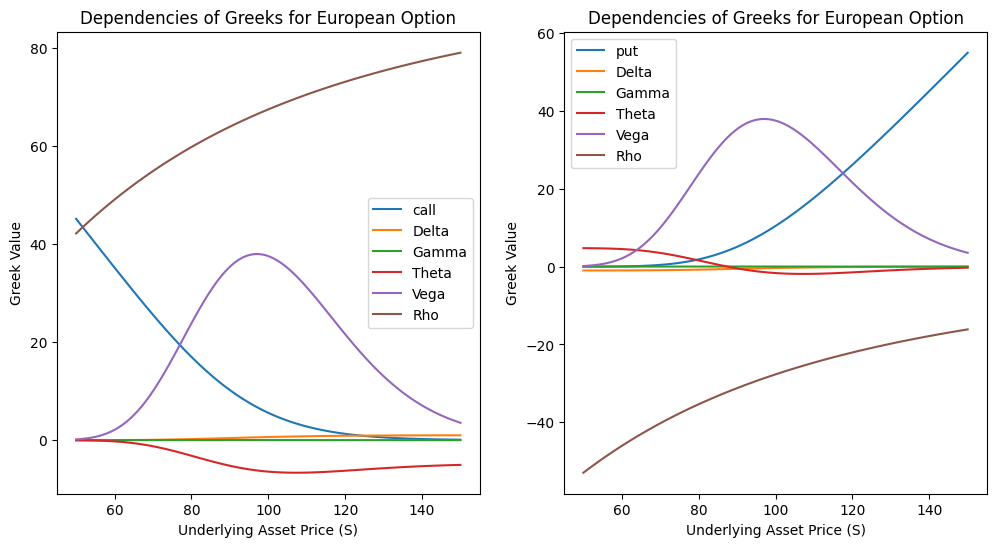

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


def bs_delta(S, K, r, t, sigma, option_type):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    if option_type == 'call':
        return norm.cdf(d1)
    elif option_type == 'put':
        return norm.cdf(d1) - 1

def bs_gamma(S, K, r, t, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    return norm.pdf(d1) / (S * sigma * np.sqrt(t))

def bs_vega(S, K, r, t, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    return S * norm.pdf(d1) * np.sqrt(t)

def bs_theta(S, K, r, t, sigma, option_type):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    if option_type == 'call':
        return -S * norm.pdf(d1) * sigma / (2 * np.sqrt(t)) - r * K * np.exp(-r * t) * norm.cdf(d2)
    elif option_type == 'put':
        return -S * norm.pdf(d1) * sigma / (2 * np.sqrt(t)) + r * K * np.exp(-r * t) * norm.cdf(-d2)

def bs_rho(S, K, r, t, sigma, option_type):
    d1 = (np.log(S/K) + (r + 0.5 * sigma*t) / (sigma * np.sqrt(t)))
    d2 = d1 - sigma * np.sqrt(t)
    if option_type == 'call':
        return K * t * np.exp(-r * t) * norm.cdf(d2)
    elif option_type == 'put':
        return -K * t * np.exp(-r * t) * norm.cdf(-d2)

option_types = ['call', 'put']



fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

for i, options in enumerate(zip(option_types, [put_prices, call_prices])):
    delta = bs_delta(S_range, K, r, t, sigma, options[0])
    gamma = bs_gamma(S_range, K, r, t, sigma)
    theta = bs_theta(S_range, K, r, t, sigma, options[0])
    vega = bs_vega(S_range, K, r, t, sigma)
    rho = bs_rho(S_range, K, r, t, sigma, options[0])
    ax[i].plot(S_range, options[1], label=options[0])
    plt.figure(figsize=(10, 8))
    ax[i].plot(S_range, delta, label='Delta')
    ax[i].plot(S_range, gamma, label='Gamma')
    ax[i].plot(S_range, theta, label='Theta')
    ax[i].plot(S_range, vega, label='Vega')
    ax[i].plot(S_range, rho, label='Rho')
    ax[i].set_xlabel('Underlying Asset Price (S)')
    ax[i].set_ylabel('Greek Value')
    ax[i].set_title('Dependencies of Greeks for European Option')
    ax[i].legend()

plt.show()

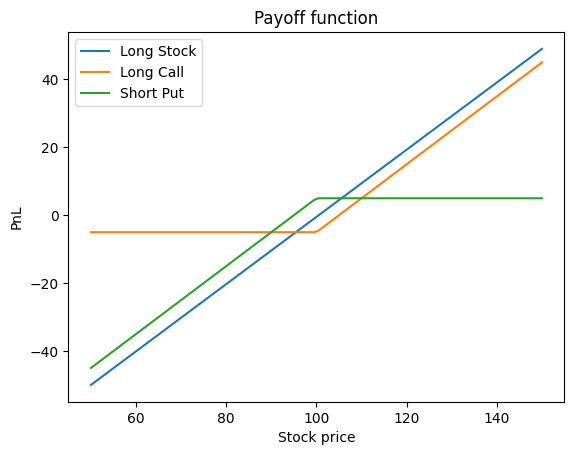

In [27]:
import numpy as np
import matplotlib.pyplot as plt

call = np.array(list(map(lambda x: max(0, x - K) - 5, S_range)))
put = np.array(list(map(lambda x: min(0, x - K)  + 5, S_range)))
stock = [i for i in range(-50, 50)]
plt.plot(S_range, stock, label='Long Stock')
plt.plot(S_range, call, label='Long Call')
plt.plot(S_range, put, label='Short Put')
plt.title('Payoff function')
plt.xlabel('Stock price')
plt.ylabel('PnL')
plt.legend()
plt.show()

#### 2) Пронаблюдать зависимость цeны европейского опциона от T − t, r и от σ, сравнить с Греками.

In [28]:
def plot_option_payment(S_range, K, r, T, sigma, parameter):

    call_prices = [bs_price(s, K, r, T, sigma, 'call') for s in S_range]
    put_prices = [bs_price(s, K, r, T, sigma, 'put') for s in S_range]

    if parameter == 'r':
        val = r
    elif parameter == 'T':
        val = T
    elif parameter == 'sigma':
        val = sigma

    plt.plot(S_range, call_prices, label=f'Call {parameter}={val}')
    plt.plot(S_range, put_prices, label=f'Put {parameter}={val}')


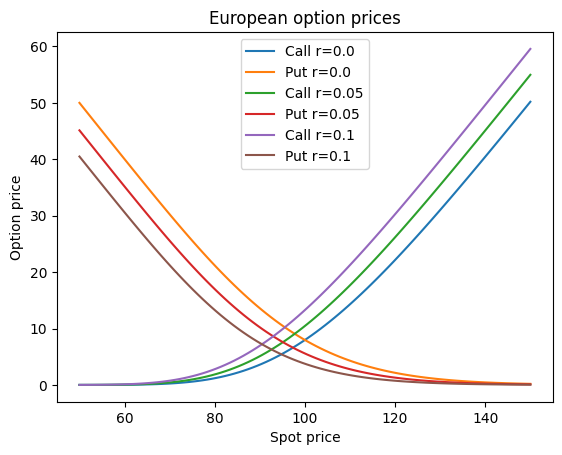

In [29]:
K = 100  # strike price
r = 0.0  # rate
sigma = 0.2  # volatility
T = t = 1
S_range = np.linspace(0.5*K, 1.5*K, 100)


for i in range(3):
    plot_option_payment(S_range, K, r, T, sigma, parameter='r')
    r += 0.05

plt.xlabel('Spot price')
plt.ylabel('Option price')

plt.title('European option prices')
plt.legend()
plt.show()


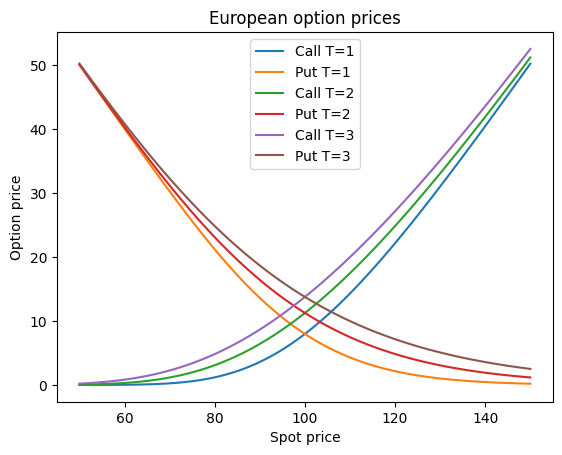

In [30]:
r = 0.0  # rate
T = t = 1

for i in range(3):
    plot_option_payment(S_range, K, r, T, sigma, parameter='T')
    T += 1

plt.xlabel('Spot price')
plt.ylabel('Option price')

plt.title('European option prices')
plt.legend()
plt.show()


/var/folders/jc/d7t24v197x18j1276v9sfjr00000gq/T/ipykernel_98222/2599689382.py:6: RuntimeWarning:

divide by zero encountered in double_scalars



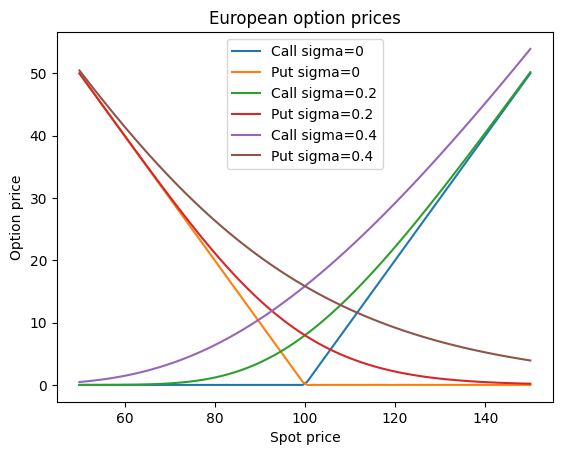

In [31]:
sigma = 0  # volatility
T = t = 1

for i in range(3):
    plot_option_payment(S_range, K, r, T, sigma, parameter='sigma')
    sigma += 0.2

plt.xlabel('Spot price')
plt.ylabel('Option price')

plt.title('European option prices')
plt.legend()
plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


K = 100  # strike price
r = 0.05  # rate
sigma = 0.2  # volatility
T = t = 0

fig = make_subplots(rows=3, cols=5)
greeks_names = ['Delta', 'Gamma', 'Theta', 'Vega', 'Rho']

# for k in range(3):
for i, options in enumerate(zip(option_types, [put_prices, call_prices])):

    r = 0
    T = t = 1
    sigma = 0.2
    for k in range(3):
        r += 0.05
        delta = bs_delta(S_range, K, r, t, sigma, options[0])
        gamma = bs_gamma(S_range, K, r, t, sigma)
        theta = bs_theta(S_range, K, r, t, sigma, options[0])
        vega = bs_vega(S_range, K, r, t, sigma)
        rho = bs_rho(S_range, K, r, t, sigma, options[0])

        greek_values = [delta, gamma, theta, vega, rho]
        greeks = {key: value for key, value in zip(greeks_names, greek_values)}
        for j, kv in enumerate(greeks.items()):
            fig.add_trace(
                go.Scatter(x=S_range, y=kv[1],
                        name=f"{options[0]} r={round(r, 2)}"),
                row=1, col=j+1,
            )

    r = 0
    T = t = 0.0001
    for k in range(3):
        t += 1
        delta = bs_delta(S_range, K, r, t, sigma, options[0])
        gamma = bs_gamma(S_range, K, r, t, sigma)
        theta = bs_theta(S_range, K, r, t, sigma, options[0])
        vega = bs_vega(S_range, K, r, t, sigma)
        rho = bs_rho(S_range, K, r, t, sigma, options[0])

        greek_values = [delta, gamma, theta, vega, rho]
        greeks = {key: value for key, value in zip(greeks_names, greek_values)}
        for j, kv in enumerate(greeks.items()):
            fig.add_trace(
                go.Scatter(x=S_range, y=kv[1],
                           name=f"{options[0]} t={round(t, 2)}"),
                row=2, col=j+1,
            )

    sigma = 0.2
    r = 0
    T = t = 1

    for k in range(3):
        sigma += 0.1
        delta = bs_delta(S_range, K, r, t, sigma, options[0])
        gamma = bs_gamma(S_range, K, r, t, sigma)
        theta = bs_theta(S_range, K, r, t, sigma, options[0])
        vega = bs_vega(S_range, K, r, t, sigma)
        rho = bs_rho(S_range, K, r, t, sigma, options[0])

        greek_values = [delta, gamma, theta, vega, rho]
        greeks = {key: value for key, value in zip(greeks_names, greek_values)}
        for j, kv in enumerate(greeks.items()):
            fig.add_trace(
                go.Scatter(x=S_range, y=kv[1],
                           name=f"{options[0]} sigma={round(sigma, 2)}"),
                row=3, col=j+1,
            )


for i in range(15):
    if i == 0:
        fig['layout']['xaxis']['title'] = 'Underlying Asset Price (S)'
        fig['layout']['yaxis']['title'] = 'Delta value'
    else:
        fig['layout'][f'xaxis{i}']['title'] = 'Underlying Asset Price (S)'
        fig['layout'][f'yaxis{i + 1}']['title'] = f'{greeks_names[i % 5]} value'


fig.update_layout(height=600, width=1500, title_text="Side By Side Subplots")
fig.show()
